Done. You have the matrices PP QQ  RR  SS  WW.
  
Done.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
These are the UNFILTERED SIMULATION results.
  
  
You have the matrices "Response" and "Response_named"
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
These are expressd as %-deviations from steady state.
  
If you want, you can download these into an excel file
or use them to make plots.
  
 
 
You have the matrices "SS_level_Response" and "SS_level_Response_named" 
  
These variables are levels, which are calculated from given steady
values and simulated values for %-deviations from steady state.
  
 
 
You have the matrices "SS_ln_Response" and "SS_ln_Response_named" 
 
These are the equivalent natural log levels.
 
NOTE:  Some levels for certain variable are negative
due to their variability, i.e. large %-deviations from steady state
and the log of negative numbers is undefined.
  
  
Trend and c

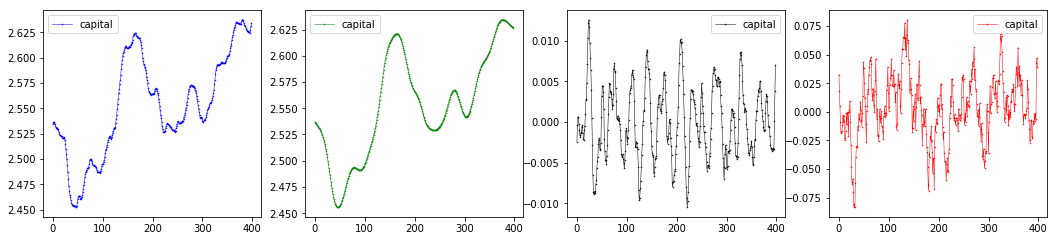

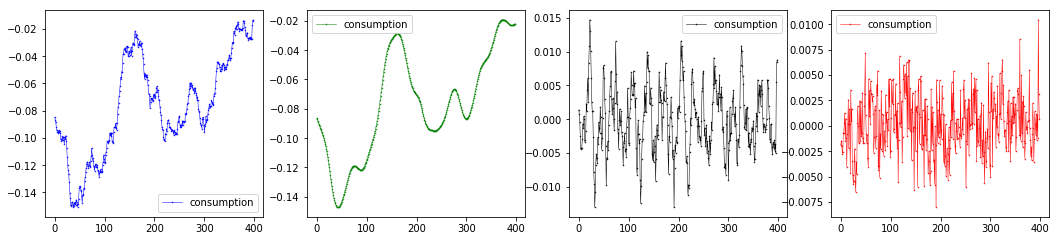

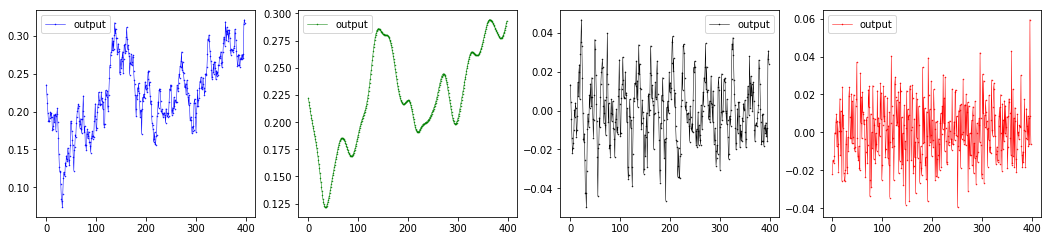

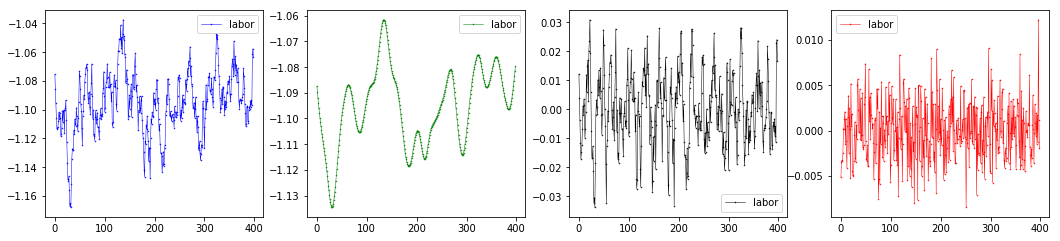

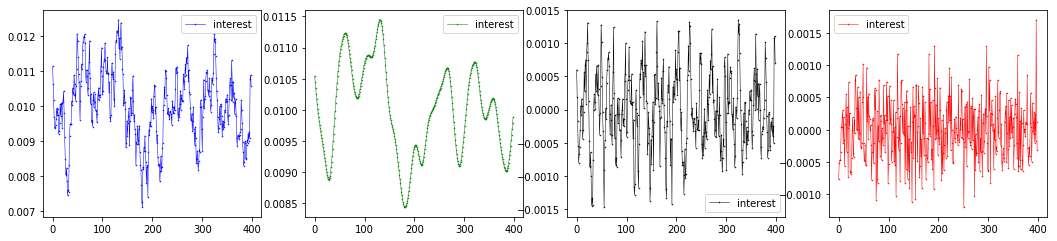

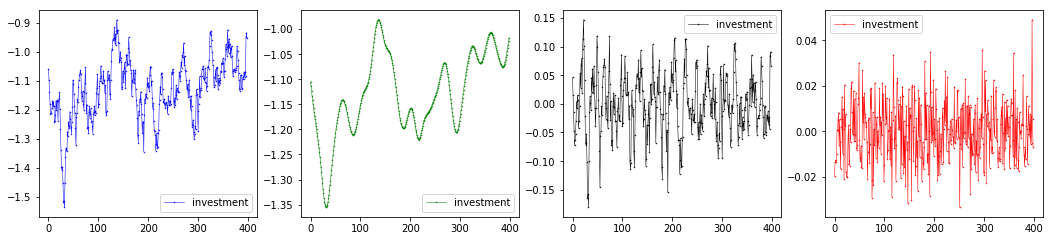

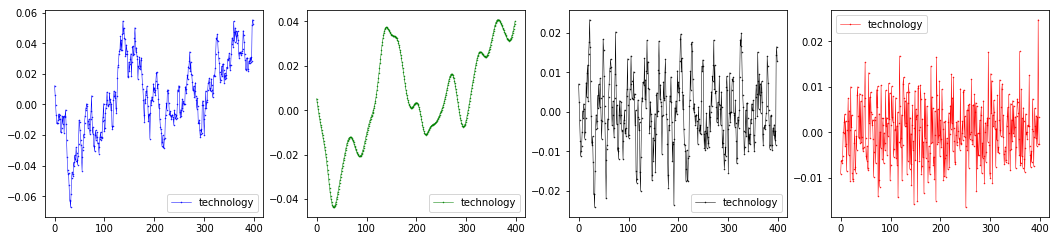

  
  
Shocks used in simulation
  


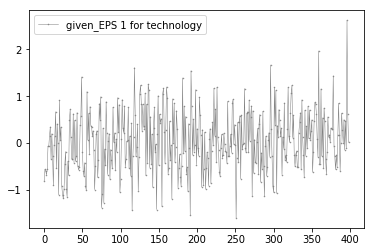

   
   
 
START:   Moments for Cyclical Ln Levels
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Cyclical Ln Levels
 


,Mean,Std Deviation,Coeff of Variation
capital,1.401402e-05,4.472061e-03,3.191132e+02
consumption,-6.148038e-06,4.759159e-03,-7.740938e+02
output,-6.815289e-05,1.649149e-02,-2.419778e+02
labor,-6.252226e-05,1.256399e-02,-2.009523e+02
interest,-3.148558e-06,5.816792e-04,-1.847446e+02
investment,-2.311586e-04,5.312986e-02,-2.298416e+02
technology,-3.620288e-05,8.484849e-03,-2.343694e+02


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Cyclical Ln Levels
 


,Correlation with GDP,Std Dev Relative to GDP
capital,3.664329e-01,2.711738e-01
consumption,8.750675e-01,2.885827e-01
output,1.000000e+00,1.000000e+00
labor,9.824211e-01,7.618472e-01
interest,9.631504e-01,3.527148e-02
investment,9.895360e-01,3.221653e+00
technology,9.995627e-01,5.144986e-01


 
 
  
Table 03:  Autocorrelations  for Cyclical Ln Levels
                  corr{ y(t=0), y(t +/- i) } 
 


,capital,consumption,output,labor,interest,investment,technology
6,2.066807e-01,2.306988e-02,-1.128902e-01,-1.306478e-01,-1.313084e-01,-1.247459e-01,-1.157782e-01
5,3.723580e-01,1.511751e-01,-1.173675e-02,-3.012414e-02,-2.990536e-02,-2.607276e-02,-1.369367e-02
4,5.409085e-01,2.949175e-01,1.156041e-01,9.674964e-02,9.603404e-02,1.029776e-01,1.135429e-01
3,7.012610e-01,4.422965e-01,2.570312e-01,2.356935e-01,2.345139e-01,2.476973e-01,2.532548e-01
2,8.447130e-01,6.286151e-01,4.722013e-01,4.511286e-01,4.498164e-01,4.635953e-01,4.677640e-01
1,9.520982e-01,8.189239e-01,7.219336e-01,7.070057e-01,7.055671e-01,7.173709e-01,7.182024e-01
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,9.520982e-01,8.189239e-01,7.219336e-01,7.070057e-01,7.055671e-01,7.173709e-01,7.182024e-01
-2,8.447130e-01,6.286151e-01,4.722013e-01,4.511286e-01,4.498164e-01,4.635953e-01,4.677640e-01
-3,7.012610e-01,4.422965e-01,2.570312e-01,2.356935e-01,2.345139e-01,2.476973e-01,2.532548e-01


 
 
  
Table 04:  Cross Correlations with Output  for Cyclical Ln Levels
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital,consumption,output,labor,interest,investment,technology
6,5.425144e-01,2.048996e-01,-1.128902e-01,-2.268533e-01,-2.752405e-01,-1.927888e-01,-1.223188e-01
5,6.138835e-01,3.112168e-01,-1.173675e-02,-1.332337e-01,-1.865209e-01,-9.657885e-02,-2.125952e-02
4,6.599304e-01,4.216896e-01,1.156041e-01,-7.449540e-03,-6.397842e-02,3.225691e-02,1.058817e-01
3,6.682503e-01,5.221416e-01,2.570312e-01,1.389801e-01,8.275043e-02,1.809891e-01,2.469353e-01
2,6.436492e-01,6.568988e-01,4.722013e-01,3.697241e-01,3.185675e-01,4.069903e-01,4.632762e-01
1,5.489927e-01,7.789152e-01,7.219336e-01,6.515386e-01,6.119344e-01,6.785647e-01,7.158672e-01
0,3.664329e-01,8.750675e-01,1.000000e+00,9.824211e-01,9.631504e-01,9.895360e-01,9.995627e-01
-1,8.017274e-02,5.355504e-01,7.219336e-01,7.442340e-01,7.457747e-01,7.417203e-01,7.235929e-01
-2,-1.381500e-01,2.511391e-01,4.722013e-01,5.243085e-01,5.415944e-01,5.125659e-01,4.762002e-01
-3,-2.933663e-01,2.310594e-02,2.570312e-01,3.294400e-01,3.573750e-01,3.106878e-01,2.630309e-01


 
 
END:   Moments for Cyclical Ln Levels
 
 
START:   Moments for Ln First Differences
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Ln First Differences
 


,Mean,Std Deviation,Coeff of Variation
capital,3.379751e-03,2.798803e-02,8.281092e+00
consumption,1.665295e-04,2.901066e-03,1.742073e+01
output,2.153611e-04,1.571480e-02,7.296952e+01
labor,-2.375488e-06,3.275462e-03,-1.378858e+03
interest,-3.305086e-06,4.596446e-04,-1.390719e+02
investment,4.883160e-05,1.304957e-02,2.672362e+02
technology,8.201744e-05,6.547605e-03,7.983187e+01


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Ln First Differences
 


,Correlation with GDP,Std Dev Relative to GDP
capital,3.577825e-01,1.780998e+00
consumption,9.331034e-01,1.846073e-01
output,1.000000e+00,1.000000e+00
labor,9.932999e-01,2.084317e-01
interest,9.859792e-01,2.924916e-02
investment,9.967993e-01,8.304002e-01
technology,9.999550e-01,4.166523e-01


 
 
  
Table 03:  Autocorrelations  for Ln First Differences
                  corr{ y(t=0), y(t +/- i) } 
 


,capital,consumption,output,labor,interest,investment,technology
6,4.548032e-01,2.730035e-02,-1.012246e-01,-1.120214e-01,-1.116872e-01,-1.103787e-01,-1.027012e-01
5,5.258932e-01,1.142660e-01,-9.440985e-03,-1.982143e-02,-1.949291e-02,-1.824443e-02,-1.086146e-02
4,6.020757e-01,1.526529e-01,1.826717e-02,7.165980e-03,7.625323e-03,8.816734e-03,1.673548e-02
3,6.777345e-01,1.059480e-01,-6.238290e-02,-7.560305e-02,-7.462728e-02,-7.377910e-02,-6.425691e-02
2,7.780563e-01,1.732427e-01,-7.686141e-03,-2.265243e-02,-2.204588e-02,-2.042273e-02,-9.749633e-03
1,8.861155e-01,2.002839e-01,-3.324498e-03,-1.976352e-02,-1.884525e-02,-1.739781e-02,-5.620409e-03
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,8.861155e-01,2.002839e-01,-3.324498e-03,-1.976352e-02,-1.884525e-02,-1.739781e-02,-5.620409e-03
-2,7.780563e-01,1.732427e-01,-7.686141e-03,-2.265243e-02,-2.204588e-02,-2.042273e-02,-9.749633e-03
-3,6.777345e-01,1.059480e-01,-6.238290e-02,-7.560305e-02,-7.462728e-02,-7.377910e-02,-6.425691e-02


 
 
  
Table 04:  Cross Correlations with Output  for Ln First Differences
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital,consumption,output,labor,interest,investment,technology
6,1.637424e-01,-1.744893e-02,-1.012246e-01,-1.252928e-01,-1.355374e-01,-1.180195e-01,-1.032522e-01
5,2.228417e-01,7.830767e-02,-9.440985e-03,-3.737406e-02,-4.973336e-02,-2.877787e-02,-1.173960e-02
4,2.438412e-01,1.084315e-01,1.826717e-02,-1.122354e-02,-2.439474e-02,-2.107503e-03,1.585464e-02
3,2.497818e-01,4.657647e-02,-6.238290e-02,-9.563948e-02,-1.101319e-01,-8.547837e-02,-6.514543e-02
2,3.091109e-01,1.129256e-01,-7.686141e-03,-4.622973e-02,-6.330697e-02,-3.436058e-02,-1.085520e-02
1,3.351482e-01,1.264215e-01,-3.324498e-03,-4.492649e-02,-6.338041e-02,-3.210840e-02,-6.742507e-03
0,3.577825e-01,9.331034e-01,1.000000e+00,9.932999e-01,9.859792e-01,9.967993e-01,9.999550e-01
-1,-1.034171e-01,-4.246994e-02,-3.324498e-03,9.349201e-03,1.498988e-02,5.438055e-03,-2.285421e-03
-2,-1.043386e-01,-4.629371e-02,-7.686141e-03,4.937695e-03,1.057520e-02,1.035662e-03,-6.653362e-03
-3,-1.031889e-01,-8.935250e-02,-6.238290e-02,-5.195674e-02,-4.705712e-02,-5.525984e-02,-6.155823e-02


 
 
END:   Moments for Ln First Differences
 


In [3]:
#  Uhlig's Exampl1.m
#  G. Hansen Indivisible Labor and Business Cycle (JME, 1985)
#  Benchmark Real Business Cycle Model 

import numpy as np

N_bar     = 1.0/3
Z_bar     = 1
rho       = .36
delta     = .025
R_bar     = 1.01
eta       = 1.0
psi       = .95
sigma_sigma = .712

betta   = 1.0/R_bar
YK_bar  = (R_bar + delta - 1)/rho
K_bar   = (YK_bar / Z_bar)**(1.0/(rho-1)) * N_bar
I_bar   = delta * K_bar
Y_bar   = YK_bar * K_bar
C_bar   = Y_bar - delta*K_bar
A       =  C_bar**(-eta) * (1 - rho) * Y_bar/N_bar    

VARNAMES = ['capital',
                         'consumption',
                         'output',
                         'labor',
                         'interest',
                         'investment',
                         'technology']

SteadyState = [[K_bar],
                         [C_bar],
                         [Y_bar],
                         [N_bar],
                         [R_bar],
                         [I_bar],
                         [1]]

AA = np.vstack(([0],
                          [- K_bar],
                          [0],
                          [0],
                          [0]))


BB = np.vstack(([0],
           [(1-delta)*K_bar],
           [rho],
           [0],
           [- rho * YK_bar ]))

CC = np.vstack(([ -C_bar, Y_bar, 0, 0, -I_bar],
           [0,           0,          0,        0,        I_bar],  
           [0,           -1,         1-rho,    0,        0],      
           [-eta,        1,          -1,       0,        0],      
           [0, rho*YK_bar, 0, - R_bar, 0 ]))

DD = np.vstack(([0],
                           [0],
                           [1],
                           [0],
                           [0]))

FF = [ 0 ]

GG = [ 0 ]

HH = [ 0 ]

JJ = np.matrix([ -eta,  0,  0,  1,  0])

KK = np.matrix([ eta,   0,  0,  0,  0])

LL = [ 0 ]

MM = [ 0 ]

NN = [psi]

Sigma = [sigma_sigma**2]

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 2


#  To calculate moments for cyclical ln levels

print(' ')
print('START:   Moments for Cyclical Ln Levels')

Input_momat =  Mat_ln_cycle
Input_momat_named = Mat_ln_cycle_named
label_mom = 'for Cyclical Ln Levels'

%run Calc_Moments.ipynb

print('END:   Moments for Cyclical Ln Levels')
print(' ')

#  To calculate moments for ln first differences

print(' ')
print('START:   Moments for Ln First Differences')

Input_momat =  Mat_ln_1st_diff 
Input_momat_named = Mat_ln_1st_diff_named
label_mom = 'for Ln First Differences'

%run Calc_Moments.ipynb

print('END:   Moments for Ln First Differences')
print(' ')




